#  I- Régression Linéaire Multiple

On parle de Régression Linéaire Multiple lorsqu'on integre plusieures variables $x_1,x_2,....x_n$
 à notre modèle et que les choses commencent à devenir vraiment intéressantes. 
Le but de la Régression Linéaire Multiple est de rouver le meilleur ensemble  $\theta=(\theta_0,\theta_1,...., \theta_n)$ revient à  minimiser le coût global des erreurs unitaires qui se définit comme suit :
		$$  \min J(\theta)=\min_{\theta}\frac{1}{2m}\sum_{i=0}^{m} (h_\theta(x(i))-y(i))^2$$
avec $m$ est la taille du training set.
Avec $$h_\theta(x)=\theta_0+\theta_1 x_1+\theta_2x_2+.....+\theta_n x_n $$  


# 1-datasets

###   Créer un modèle à deux variables de régression linéaire multiple (n=2), 
 (x,y) avec $m$ exemples, $2$ variables 
		
$
			X=\begin{pmatrix} 
			x_1^{(1)}&	x_2^{(1)}&1\\                
			x_1^{(2)}&x_2^{(2)}&1\\ 
			..&..&..1\\ 
			..&..&..1\\ 
			x_1^{(m)}&x_2^{(m)}&1
			\end{pmatrix}\notag
			$
            
$       Y= \begin{pmatrix}
		Y^{(1)}\\ 
		Y^{(2)}\\
		.....\\
		.....\\
		Y^{(m)}
        \end{pmatrix}
        $
            
$           \theta=\begin{pmatrix} 
			\theta_1\\ 
			\theta_2\\ 
			\theta_0
			\end{pmatrix}
            $
	
  

#### 1-Générer de données aléatoires
#### 2-Afficher les données en 2D puis en 3D


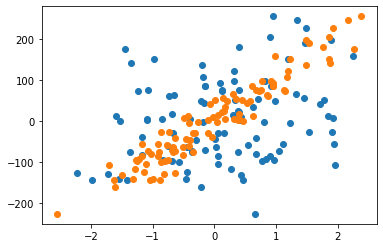

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
np.random.seed(0)
x,y = make_regression(n_samples = 100 , n_features = 2 , noise = 0.01)
plt.scatter(x[:,0],y)
plt.scatter(x[:,1],y)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(x[:,0],x[:,1],y)


NameError: name 'plt' is not defined

#### 3-redimentioner les matrices, créer la matrice X et $\theta$

In [3]:
np.random.seed(0)
y = np.reshape(y,(100,1))
ones = np.ones((100,1))
ones
X = np.concatenate((x,ones),axis=1)
Theta = np.random.randn(3,1)
Theta

array([[1.76405235],
       [0.40015721],
       [0.97873798]])

In [4]:
y.shape

(100, 1)

#### 4-Implémenter le model de prédiction, Fonction cout, Gradients et Descente de Gradient

In [4]:
def H(x,theta):
    return np.dot(x,theta)

In [5]:
def J(x,y,theta):
    return (1/2*len(x))*np.sum((H(x,theta)-y)*(H(x,theta)-y))
J(X,y,Theta)

51193060.2087231

In [9]:
def dJ(x,y,theta):
        return (1/len(x))*np.dot(np.transpose(x),(H(x,theta)-y))
dJ(X,y,th)    

array([[-0.00244549],
       [-0.00306897],
       [ 0.0021572 ]])

 #### 5-Afficher les valeurs de $\theta$


In [10]:
def gradient(x,y,theta,n_iter,alpha):
    cost_history = np.zeros(n_iter)
    for i in range(n_iter):
        theta = theta - alpha * dJ(x,y,theta)
        cost_history[i] = J(x,y,theta)
    return theta , cost_history
th,cout = gradient(X,y,Theta,1000,0.01)
th

array([[2.92114714e+01],
       [9.61917406e+01],
       [2.03156175e-03]])

### 6-Afficher les résultats de prédictions par rapport a notre Dataset ainsi que la courbe d'apprentissage

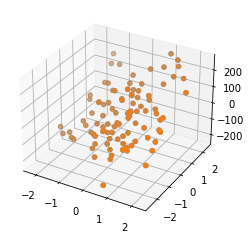

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(x[:,0],x[:,1],y)
ax.scatter(x[:,0],x[:,1],H(X,th))

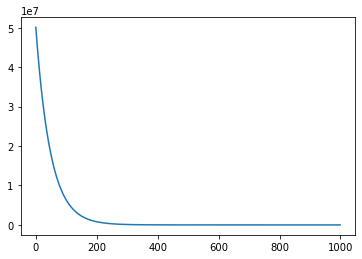

In [12]:
plt.plot(range(1000),cout)

### 7-Utiliser le coefficient de détermination pour évaluer la réelle performance et interpréter le resultats

In [13]:
def RR(y,pred):
    u = ((y-pred)**2).sum()
    v = ((y-y.mean())**2).sum()
    return 1 - u/v
RR(y,H(X,th))

0.9999999893864526

#  II- Régression Polynomiale

Pour développer un modèle polynomial à partir des équations de la régression linéaire, il suffit d'ajouter des degrés de polynome dans les colonnes de la matrice. On développera un modèle qui vise à chercher la fonction de prédiction $$h_\theta(x)=\theta_0+\theta_1 x+\theta_2x^2+.....+\theta_n x^n $$  

# 1-datasets
	Pour n=2, on a 
$
			X=\begin{pmatrix} 
			x^{(1)}&	x^{2^{(1)}}&1\\                
			x^{(2)}&x^{2^{(2)}}&1\\ 
			..&..&..1\\ 
			..&..&..1\\ 
			x^{(m)}&x^{2^{(m)}}&1
			\end{pmatrix}\notag
			$
            
$       Y= \begin{pmatrix}
		Y^{(1)}\\ 
		Y^{(2)}\\
		.....\\
		.....\\
		Y^{(m)}
        \end{pmatrix}
        $
            
$           \theta=\begin{pmatrix} 
			\theta_1\\ 
			\theta_2\\ 
			\theta_0
			\end{pmatrix}
            $
	

 ### Refaire les mêmes étapes pour créer un model de prédiction par la régression polynomiale
  NB:modifier les valeurs de y pour rendre le dataset non-linéaire ( utiliser une fonction non linéaire)

In [6]:
np.random.seed(0)
x,y = make_regression(n_samples=100,n_features=1,noise=10)
y = np.reshape(y,(100,1))
y = 0.5*y+ 0.8*y**2
ones = np.ones((100,1),dtype=int)
X = np.concatenate((x,x**2,ones),axis=1)
X

array([[-3.59553162e-01,  1.29278476e-01,  1.00000000e+00],
       [ 9.76639036e-01,  9.53823808e-01,  1.00000000e+00],
       [ 4.02341641e-01,  1.61878796e-01,  1.00000000e+00],
       [-8.13146282e-01,  6.61206876e-01,  1.00000000e+00],
       [-8.87785748e-01,  7.88163534e-01,  1.00000000e+00],
       [ 4.43863233e-01,  1.97014569e-01,  1.00000000e+00],
       [-9.77277880e-01,  9.55072054e-01,  1.00000000e+00],
       [ 4.28331871e-01,  1.83468191e-01,  1.00000000e+00],
       [ 2.08274978e-01,  4.33784665e-02,  1.00000000e+00],
       [-3.11552532e-01,  9.70649803e-02,  1.00000000e+00],
       [-5.10805138e-01,  2.60921889e-01,  1.00000000e+00],
       [ 1.26912093e-01,  1.61066793e-02,  1.00000000e+00],
       [-1.53624369e+00,  2.36004466e+00,  1.00000000e+00],
       [-4.01780936e-01,  1.61427921e-01,  1.00000000e+00],
       [ 6.53618595e-01,  4.27217268e-01,  1.00000000e+00],
       [ 1.17877957e+00,  1.38952128e+00,  1.00000000e+00],
       [-1.79924836e-01,  3.23729465e-02

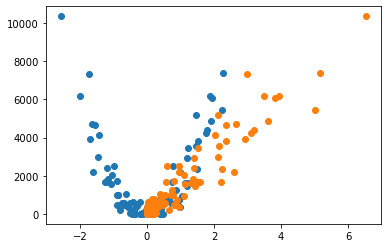

In [15]:
plt.scatter(X[:,0],y)
plt.scatter(X[:,1],y)

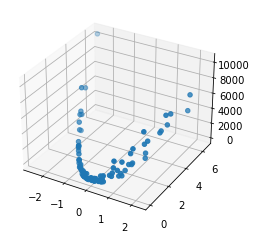

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0],X[:,1],y)

In [17]:
np.random.seed(0)
te = np.random.randn(3,1)


In [18]:
New_H = H(X,te)
New_H.shape

(100, 1)

In [19]:
new_thta,new_cout = gradient(X,y,te,1000,0.01)
new_thta

array([[-109.09635844],
       [1480.96310515],
       [  68.96092418]])

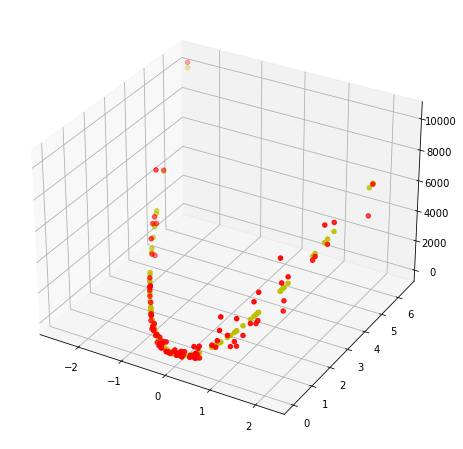

In [23]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0],X[:,1],y,c='r')
ax.scatter(X[:,0],X[:,1],H(X,new_thta),c='y')

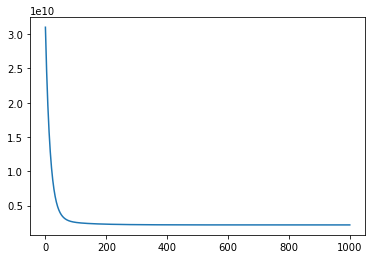

In [24]:
plt.plot(range(1000),new_cout)

In [25]:
RR(y,H(X,new_thta))

0.8939949262291843

# III- Régressions linéaires avec Statsmodels et Scikit-Learn
 En utilisant les données du fichiers "mtcars.csv", on vise à prédire la consommation d'essence du véhicule "mpg" en fonction du poids du véhicule "wt" et la puissance du vehicule "hp" (horse power) en appliquant la régression linéaire multiple et polynomiale.

## 1-Regression  multiple en utilisant Scikit-Learn 
    1-importer les données 
    2-faites appel à "linear_model.LinearRegression" de Scikit-Learn 
    3-Vous faites la prédiction
    4-Afficher en 3d les résultats 
    5-Quel est la consommation d'essence du véhicule prédite avec le poids de 3.1 et une puissance de 120

In [7]:
import pandas as pd
df = pd.read_csv('mtcars.csv')
X = df[['wt','hp']]
y = np.array([df['mpg']])
y = np.reshape(y,(32,1))
X.shape

KeyError: "None of [Index(['wt', 'hp'], dtype='object')] are in the [columns]"

In [149]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

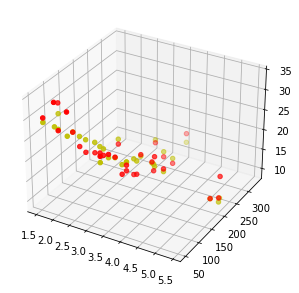

In [150]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X['wt'],X['hp'],y,c='r')
ax.scatter(X['wt'],X['hp'],y_pred,c='y')

In [151]:
test = np.array([3.1,120])
test = np.reshape(test,(1,2))
pred = model.predict(test)
print("la consommation d'essence de cette véhicule est: ",pred[0][0])

la consommation d'essence de cette véhicule est:  21.39324117713338


In [152]:
model.score(X,y)

0.8267854518827914

In [153]:
from sklearn.metrics import r2_score
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

Coefficient of determination: 0.83


## 2-Regression  multiple en utilisant statsmodels
    refaire les memes etatpes, comparer les résultas

In [155]:
import statsmodels.api as sm

#Exécution de la régression
model_2 = sm.OLS(y, X)
results = model_2.fit()

In [158]:
#Afficher le résumé des résultats
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.726
Model:                            OLS   Adj. R-squared (uncentered):              0.708
Method:                 Least Squares   F-statistic:                              39.83
Date:                Sun, 20 Feb 2022   Prob (F-statistic):                    3.60e-09
Time:                        12:17:11   Log-Likelihood:                         -122.01
No. Observations:                  32   AIC:                                      248.0
Df Residuals:                      30   BIC:                                      251.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------